In [43]:
#%pip install pandas seaborn matplotlib scipy statsmodels

In [44]:
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 
import scipy 
import numpy as np
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [45]:
# leitura do arquivo
tabela = pd.read_csv('TabelaSalarial.csv')
tabela

,N,Estado Civil,Grau de Instrução,N de Filhos,Salario (x Sal Min),Idade (em anos),Região de Procedência
0,1,solteiro,ensino fundamental,NaN,4.00,26,interior
1,2,casado,ensino fundamental,1.0,4.56,32,capital
2,3,casado,ensino fundamental,2.0,5.25,36,capital
3,4,solteiro,ensino médio,NaN,5.73,20,outra
4,5,solteiro,ensino fundamental,NaN,6.26,40,outra
5,6,casado,ensino fundamental,0.0,6.66,28,interior
6,7,solteiro,ensino fundamental,NaN,6.86,41,interior
7,8,solteiro,ensino fundamental,NaN,7.39,43,capital
8,9,casado,ensino médio,1.0,7.59,34,capital
9,10,solteiro,ensino médio,NaN,7.44,23,outra


In [46]:

# Entender o arquivo para manipular dados inconsistntes
tabela.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   N                      36 non-null     int64  
 1   Estado Civil           36 non-null     object 
 2   Grau de Instrução      36 non-null     object 
 3   N de Filhos            20 non-null     float64
 4   Salario (x Sal Min)    36 non-null     float64
 5   Idade (em anos)        36 non-null     int64  
 6   Região de Procedência  36 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 2.1+ KB


In [47]:
# Como os dados estão bem estruturados, vamos só preencher as células NaN com zero
tabela_clean = tabela.fillna(0)
tabela_clean.describe()

,N,N de Filhos,Salario (x Sal Min),Idade (em anos)
count,36.000000,36.000000,36.000000,36.000000
mean,18.500000,0.916667,11.122222,34.583333
std,10.535654,1.250714,4.587458,6.737422
min,1.000000,0.000000,4.000000,20.000000
25%,9.750000,0.000000,7.552500,30.000000
50%,18.500000,0.000000,10.165000,34.500000
75%,27.250000,2.000000,14.060000,40.000000
max,36.000000,5.000000,23.300000,48.000000


In [48]:
# Quais são os fatores que mais influenciam no salário?

tabela_numerica1 = tabela_clean.select_dtypes(include=[np.number])
tabela_numerica = tabela_numerica1.drop(columns=['N'])



In [49]:

pearson_correl = tabela_numerica.corr(method='pearson')
display(pearson_correl)

,N de Filhos,Salario (x Sal Min),Idade (em anos)
N de Filhos,1.000000,0.375551,0.422981
Salario (x Sal Min),0.375551,1.000000,0.363362
Idade (em anos),0.422981,0.363362,1.000000


# Interpretação das correlações

###  0.00 a 0.02  : Muito Fraca
###  0.02 a 0.10  : Fraca
###  0.10 a 0.30  : Moderada
###  0.30 a 0.50  : Forte
###  0.50 a 1.00  : Muito Forte (Verifique os dados!)

C:\Users\gafeb\AppData\Local\Temp\ipykernel_16056\330097234.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=tabela_numerica, x="Faixa de Idade", y="N de Filhos", errorbar=None, palette="viridis", estimator=np.mean)
C:\Users\gafeb\AppData\Local\Temp\ipykernel_16056\330097234.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=tabela_numerica, x="Faixa de Salário", y="Salario (x Sal Min)", errorbar=None, palette="viridis")


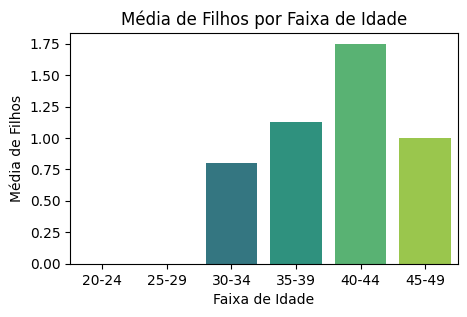

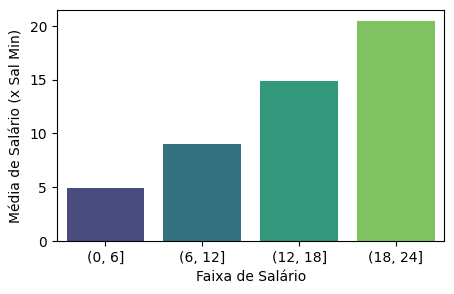

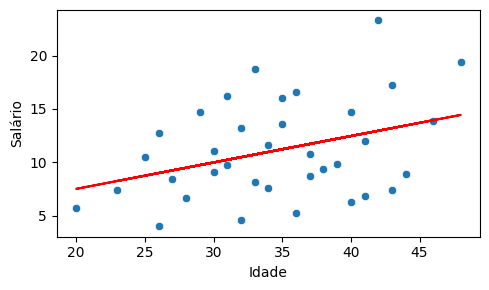

In [57]:
# Análise 1- Idade e número de filhos
# Criar faixas de idade em intervalos de 5 anos

tabela_numerica['Faixa de Idade'] = pd.cut(tabela_numerica['Idade (em anos)'], bins=[20, 24, 29, 34, 39, 44, 49], 
                                           labels=['20-24', '25-29', '30-34', '35-39', '40-44', '45-49'])

# Ajustar o tamanho da figura
plt.figure(figsize=(5, 3))

# Criar o gráfico de barras com as faixas de idade
sb.barplot(data=tabela_numerica, x="Faixa de Idade", y="N de Filhos", errorbar=None, palette="viridis", estimator=np.mean)

# Adicionar rótulos e título
plt.xlabel("Faixa de Idade")
plt.ylabel("Média de Filhos")
plt.title("Média de Filhos por Faixa de Idade")

# Análise 2 - Salário e número de filhos
# Criar faixas de salário em intervalos de 1000 reais

tabela_numerica['Faixa de Salário'] = pd.cut(tabela_numerica['Salario (x Sal Min)'], 
                                             bins=[0, 6, 12, 18, 24])

# Ajustar o tamanho da figura
plt.figure(figsize=(5, 3))

# Criar o gráfico de barras com as faixas de salário
sb.barplot(data=tabela_numerica, x="Faixa de Salário", y="Salario (x Sal Min)", errorbar=None, palette="viridis")

# Adicionar rótulos e título
plt.xlabel("Faixa de Salário")
plt.ylabel("Média de Salário (x Sal Min)")

# Análise 3 - Salário e idade

# Ajustar o tamanho da figura
plt.figure(figsize=(5, 3))

# Criar o gráfico de dispersão com a idade e o salário

# Criar o gráfico de dispersão
sb.scatterplot(data=tabela_numerica, x="Idade (em anos)", y="Salario (x Sal Min)")

# Calcular a linha de tendência
x = tabela_numerica["Idade (em anos)"]
y = tabela_numerica["Salario (x Sal Min)"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

# Adicionar rótulos e título
plt.xlabel("Idade")
plt.ylabel("Salário")
figsize=(5, 3)

# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()


#### Os gráficos confirmam a tendência mostrada pelas correlações estatísticas

In [59]:
# Convertendo variáveis qualitativas para variáveis dummy
tabela_clean_dummies = pd.get_dummies(tabela_clean, columns=['Grau de Instrução', 'Região de Procedência'], drop_first=True)
tabela_clean_dummies['Estado Civil'] = tabela_clean_dummies['Estado Civil'].map({'solteiro': 0, 'casado': 1})

# Renomear colunas para remover espaços e caracteres especiais
tabela_clean_dummies.columns = tabela_clean_dummies.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Variáveis numéricas
numeric_vars = ['Idade_em_anos', 'Salario_x_Sal_Min', 'N_de_Filhos']

# Agrupando variáveis qualitativas dummy
qualitative_groups = {
    'Estado_Civil': ['Estado_Civil'],
    'Grau_de_Instrução': [col for col in tabela_clean_dummies.columns if 'Grau_de_Instrução' in col],
    'Região_de_Procedência': [col for col in tabela_clean_dummies.columns if 'Região_de_Procedência' in col]
}

# Função para calcular o R^2
def calculate_r_squared(dependent_var, independent_vars):
    formula = f"{dependent_var} ~ " + " + ".join(independent_vars)
    model = ols(formula, data=tabela_clean_dummies).fit()
    return model.rsquared

# Criar a tabela de R^2
r_squared_table = pd.DataFrame(index=numeric_vars, columns=qualitative_groups.keys())

for numeric_var in numeric_vars:
    for qual_group, qual_vars in qualitative_groups.items():
        r_squared = calculate_r_squared(numeric_var, qual_vars)
        r_squared_table.loc[numeric_var, qual_group] = r_squared

display(r_squared_table)


,Estado_Civil,Grau_de_Instrução,Região_de_Procedência
Idade_em_anos,0.009095,0.327633,0.027332
Salario_x_Sal_Min,0.06125,0.555185,0.012725
N_de_Filhos,0.442009,0.164123,0.033741


# Interpretação dos valores de R^2
#
###  0   a 0.1   : Muito Fraca
###  0.1 a 0.3   : Fraca
###  0.3 a 0.7   : Moderada
###  0.7 a 1.0   : Forte 

ValueError: Could not interpret value `Salário (x Sal Min)` for `x`. An entry with this name does not appear in `data`.

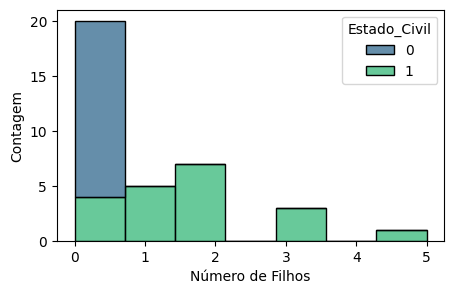

<Figure size 500x300 with 0 Axes>

In [64]:
# Fazendo as análises por histogramas das variáveis que aprenstam as melhores correlações:
# 1- Número de filhos com estado civil
# 2- Salário com Grau de instrução

# histograma do número de filhos por estado civil
plt.figure(figsize=(5, 3))
sb.histplot(data=tabela_clean_dummies, x='N_de_Filhos', hue='Estado_Civil', palette='viridis', multiple='stack')
plt.xlabel('Número de Filhos')
plt.ylabel('Contagem')

# histograma do salário por grau de instrução
plt.figure(figsize=(5, 3))
sb.histplot(data=tabela_clean , x='Salário (x Sal Min)', hue='Grau de Instrução', palette='viridis', multiple='stack')
plt.xlabel('Salário (x Sal Min)')
plt.ylabel('Contagem')

# Ajustar layout
plt.tight_layout()

# Mostrar os gráficos
plt.show()